# HW 3 - Data Classification

### Daniel Caicedo


In [1]:
# Data Preprocessing

import pandas as pd

# Read the CSV file into a DataFrame, including only 'label' and 'sessions' columns
df = pd.read_csv('waze_dataset.csv', usecols=['label', 'sessions'])

# Replace 'retained' with 1 and 'churned' with 0 in the 'label' column
df['label'] = df['label'].fillna(0)

df = df.head(5000)

# Save the modified DataFrame back to a CSV file
df.to_csv('preprocessed_waze_dataset.csv', index=False)




In [3]:
import pandas as pd

# Read the preprocessed dataset into a DataFrame
df = pd.read_csv('preprocessed_waze_dataset.csv')

# Define a function to implement K-Nearest Neighbors from scratch
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return y_pred

    def _predict(self, x):
        distances = [((x - x_train) ** 2).sum() for x_train in self.X_train]
        k_indices = sorted(range(len(distances)), key=lambda i: distances[i])[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common

# Convert 'sessions' column to a NumPy array
X = df['sessions'].values

# Convert 'label' column to a NumPy array
y = df['label'].values

# Initialize the KNN model and fit it to the data
knn = KNNClassifier(k=3)
knn.fit(X, y)

# Make predictions on the entire dataset
y_pred = knn.predict(X)

# Calculate accuracy on the training data
accuracy = sum(y_pred == y) / len(y)

print(f'Accuracy on the entire dataset: {accuracy * 100:.2f}%')


Accuracy on the entire dataset: 75.00%


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Read the preprocessed dataset into a DataFrame
df = pd.read_csv('preprocessed_waze_dataset.csv')

# Encode labels ('retained' to 1 and 'churned' to 0)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Split data into features (X) and target variable (y)
X = df[['sessions']]
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
y_pred_dt = decision_tree_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Random Forest Classifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)
y_pred_rf = random_forest_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')
print(f'Decision Tree Accuracy: {accuracy_dt * 100:.2f}%')
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')
print(f'Gradient Boosting Accuracy: {accuracy_gb * 100:.2f}%')


SVM Accuracy: 77.30%
Decision Tree Accuracy: 75.10%
Random Forest Accuracy: 76.00%
Gradient Boosting Accuracy: 76.80%


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Read the preprocessed dataset into a DataFrame
df = pd.read_csv('preprocessed_waze_dataset.csv')

# Encode labels ('retained' to 1 and 'churned' to 0)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Split data into features (X) and target variable (y)
X = df[['sessions']]
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Random Search for Random Forest
rf_random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_grid_rf, n_iter=10, cv=3, n_jobs=-1, random_state=42)
rf_random_search.fit(X_train, y_train)

# Get the best Random Forest model
best_rf_model = rf_random_search.best_estimator_

# Evaluate the best Random Forest model
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}

# Perform Random Search for Gradient Boosting
gb_random_search = RandomizedSearchCV(gb_classifier, param_distributions=param_grid_gb, n_iter=10, cv=3, n_jobs=-1, random_state=42)
gb_random_search.fit(X_train, y_train)

# Get the best Gradient Boosting model
best_gb_model = gb_random_search.best_estimator_

# Evaluate the best Gradient Boosting model
y_pred_gb = best_gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print("Random Forest - Best Hyperparameters:")
print(best_rf_model)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')

print("\nGradient Boosting - Best Hyperparameters:")
print(best_gb_model)
print(f'Gradient Boosting Accuracy: {accuracy_gb * 100:.2f}%')


Random Forest - Best Hyperparameters:
RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=150)
Random Forest Accuracy: 77.10%

Gradient Boosting - Best Hyperparameters:
GradientBoostingClassifier(learning_rate=0.01, n_estimators=50)
Gradient Boosting Accuracy: 77.30%


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from tabulate import tabulate

# Read the preprocessed dataset into a DataFrame
df = pd.read_csv('preprocessed_waze_dataset.csv')

# Encode labels ('retained' to 1 and 'churned' to 0)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Split data into features (X) and target variable (y)
X = df[['sessions']]
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a dictionary to store the results
results = {}

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
results['SVM'] = accuracy_svm

# Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
y_pred_dt = decision_tree_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
results['Decision Tree'] = accuracy_dt

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
results['Random Forest'] = accuracy_rf

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
results['Gradient Boosting'] = accuracy_gb

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_grid_rf, n_iter=10, cv=3, n_jobs=-1, random_state=42)
rf_random_search.fit(X_train, y_train)
best_rf_model = rf_random_search.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
results['Random Forest (Tuned)'] = accuracy_rf_tuned

# Hyperparameter tuning for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}
gb_random_search = RandomizedSearchCV(gb_classifier, param_distributions=param_grid_gb, n_iter=10, cv=3, n_jobs=-1, random_state=42)
gb_random_search.fit(X_train, y_train)
best_gb_model = gb_random_search.best_estimator_
y_pred_gb_tuned = best_gb_model.predict(X_test)
accuracy_gb_tuned = accuracy_score(y_test, y_pred_gb_tuned)
results['Gradient Boosting (Tuned)'] = accuracy_gb_tuned

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

# Print the results in tabular format
table = tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False)
print(table)


╒═══════════════════════════╤════════════╕
│ Model                     │   Accuracy │
╞═══════════════════════════╪════════════╡
│ SVM                       │      0.773 │
├───────────────────────────┼────────────┤
│ Decision Tree             │      0.751 │
├───────────────────────────┼────────────┤
│ Random Forest             │      0.759 │
├───────────────────────────┼────────────┤
│ Gradient Boosting         │      0.768 │
├───────────────────────────┼────────────┤
│ Random Forest (Tuned)     │      0.773 │
├───────────────────────────┼────────────┤
│ Gradient Boosting (Tuned) │      0.773 │
╘═══════════════════════════╧════════════╛


/Users/danielcaicedo/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


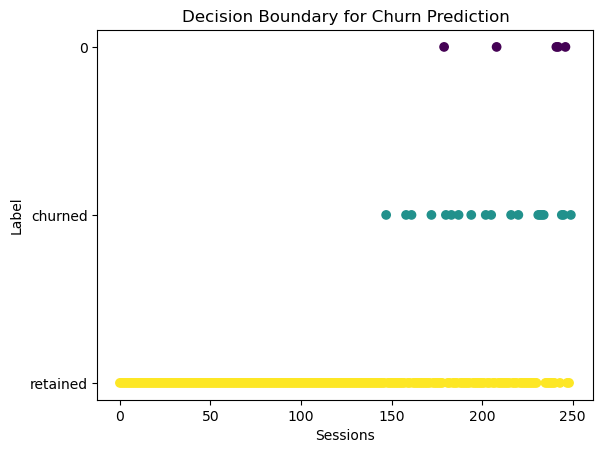

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a range of sessions values
sessions_values = np.arange(0, 250, 1)

# Create a mesh grid of sessions values
X_mesh = np.array(list(zip(sessions_values)))

# Predict the labels for the sessions values
predictions = decision_tree_classifier.predict(X_mesh)

# Convert predictions (0 for churned, 1 for retained) back to labels
predicted_labels = label_encoder.inverse_transform(predictions)

# Create a scatter plot to visualize the decision boundary
plt.scatter(sessions_values, predicted_labels, c=predictions, cmap='viridis')
plt.xlabel('Sessions')
plt.ylabel('Label')
plt.title('Decision Boundary for Churn Prediction')
plt.show()


In [13]:
import pandas as pd
import numpy as np

# Read the preprocessed dataset into a DataFrame
df = pd.read_csv('preprocessed_waze_dataset.csv')

# Encode labels ('retained' to 1 and 'churned' to 0)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Split data into features (X) and target variable (y)
X = df[['sessions']]
y = df['label']

# Train the Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X, y)

# Create session ranges
session_ranges = [(0, 20), (20, 40), (40, 60), (60, 80), (80, 100), (100, 120), (120, 140), (140, 160), (140, 160), (160, 180), (180, 200), (200, 220), (220, 240), (240, 260)]

# Calculate churn probability for each range
churn_probabilities = []
for session_range in session_ranges:
    lower_bound, upper_bound = session_range
    subset_df = df[(df['sessions'] >= lower_bound) & (df['sessions'] < upper_bound)]
    X_subset = subset_df[['sessions']]
    churn_probability = decision_tree_classifier.predict_proba(X_subset)[:, 0].mean()
    churn_probabilities.append((f'{lower_bound}-{upper_bound} sessions', churn_probability))

# Display churn probabilities for each range
for range_label, churn_prob in churn_probabilities:
    print(f'{range_label} = Churned rate of {churn_prob * 100:.2f}%')


0-20 sessions = Churned rate of 4.25%
20-40 sessions = Churned rate of 4.65%
40-60 sessions = Churned rate of 4.13%
60-80 sessions = Churned rate of 5.88%
80-100 sessions = Churned rate of 4.65%
100-120 sessions = Churned rate of 5.02%
120-140 sessions = Churned rate of 5.20%
140-160 sessions = Churned rate of 4.97%
140-160 sessions = Churned rate of 4.97%
160-180 sessions = Churned rate of 3.97%
180-200 sessions = Churned rate of 3.33%
200-220 sessions = Churned rate of 5.43%
220-240 sessions = Churned rate of 1.61%
240-260 sessions = Churned rate of 7.69%
